<a href="https://colab.research.google.com/github/nura6199/my-dissertation/blob/main/CNN_RF_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount Google Drive to access dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import the required Libraries*

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import gradio as gr
import tensorflow as tf


In [ ]:
# Set random seed for reproducibility
np.random.seed(42)


# **Upload the datasts**

In [ ]:
# Define paths
base_dir = '/content/drive/MyDrive/HRF'
glaucoma_dir = os.path.join(base_dir, 'Glaucoma')
normal_dir = os.path.join(base_dir, 'Normal')


In [ ]:
# Image parameters
img_width, img_height = 224, 224
batch_size = 32

# **Preprocessing**

In [ ]:
# Data preprocessing and augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

Found 2772 images belonging to 2 classes.
Found 692 images belonging to 2 classes.


# **Building the CNN Model**

In [ ]:
# CNN model
def create_cnn_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

cnn_model = create_cnn_model()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training The CNN MOdel

In [ ]:
# Train CNN model
history = cnn_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


86/86 ━━━━━━━━━━━━━━━━━━━━ 2067s 22s/step - accuracy: 0.8546 - loss: 0.4521 - val_accuracy: 0.8676 - val_loss: 0.3666
Epoch 2/10
 1/86 ━━━━━━━━━━━━━━━━━━━━ 4:27 3s/step - accuracy: 0.9062 - loss: 0.3262

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


86/86 ━━━━━━━━━━━━━━━━━━━━ 71s 796ms/step - accuracy: 0.9062 - loss: 0.3262 - val_accuracy: 0.8500 - val_loss: 0.4158
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 333s 4s/step - accuracy: 0.8595 - loss: 0.4068 - val_accuracy: 0.8661 - val_loss: 0.3766
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8125 - loss: 0.6436 - val_accuracy: 0.9000 - val_loss: 0.2852
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 330s 4s/step - accuracy: 0.8621 - loss: 0.3779 - val_accuracy: 0.8676 - val_loss: 0.3133
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8438 - loss: 0.4213 - val_accuracy: 0.8500 - val_loss: 0.3688
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 331s 4s/step - accuracy: 0.8654 - loss: 0.3400 - val_accuracy: 0.8631 - val_loss: 0.2807
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9375 - loss: 0.1982 - val_accuracy: 1.0000 - val_loss: 0.0448
Epoch 9/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 339s 4s/step - accuracy: 0.8830 - loss: 0.3003 - val_accuracy: 0.8661 - val_loss: 0.2

## **Feature extraction using CNN**

In [ ]:

def extract_features(generator):
    features = []
    labels = []
    for i in range(len(generator)):
        x, y = generator[i]
        feature = cnn_model.predict(x)
        features.extend(feature)
        labels.extend(y)
    return np.array(features), np.array(labels)

train_features, train_labels = extract_features(train_generator)
val_features, val_labels = extract_features(validation_generator)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 779ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 767ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 995ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 772ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 769ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 759ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 768ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 767ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 743ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 757ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 773ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 769ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 765ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 750ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 767ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 775ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 740ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 974ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 759ms/step
1/1 ━━━

# **Building the Random Forest**

In [ ]:
# Prepare data for Random Forest
X = np.concatenate((train_features, val_features))
y = np.concatenate((train_labels, val_labels))

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)


In [ ]:
# Cross-validation
cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=7)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean()}")


Cross-validation scores: [0.83585859 0.84343434 0.8459596  0.81060606 0.83080808 0.85353535
 0.83544304]
Mean CV score: 0.8365207225966719


In [ ]:
# Train Random Forest model
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions
y_pred = rf_model.predict(X_test_scaled)


In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[534  69]
 [ 53  37]]


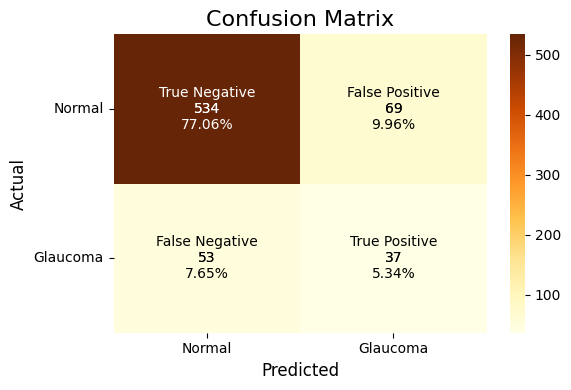

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrBr', cbar=True)
plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.xticks([0.5, 1.5], ['Normal', 'Glaucoma'], fontsize=10)
plt.yticks([0.5, 1.5], ['Normal', 'Glaucoma'], fontsize=10, rotation=0)

# Add text annotations
group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

for i in range(2):
    for j in range(2):
        plt.text(j+0.5, i+0.5, labels[i, j], ha='center', va='center', fontsize=10,
                 color='black' if cm[i, j] < np.max(cm)/2 else 'white')

plt.tight_layout()
plt.show()


In [ ]:
# Classification Report
class_report = classification_report(y_test, y_pred, target_names=['Normal', 'Glaucoma'])
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

      Normal       0.91      0.89      0.90       603
    Glaucoma       0.35      0.41      0.38        90

    accuracy                           0.82       693
   macro avg       0.63      0.65      0.64       693
weighted avg       0.84      0.82      0.83       693



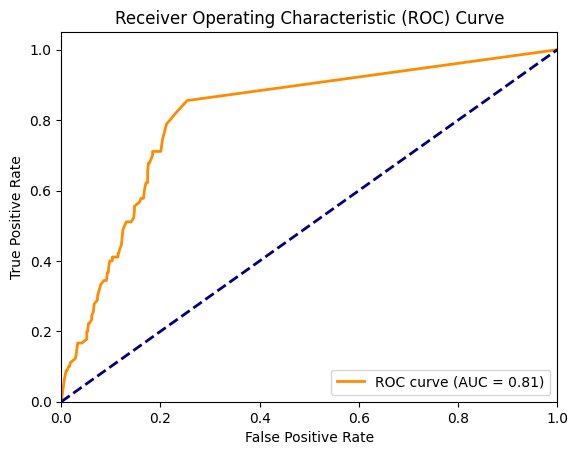

In [ ]:
# ROC Curve
y_pred_proba = rf_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


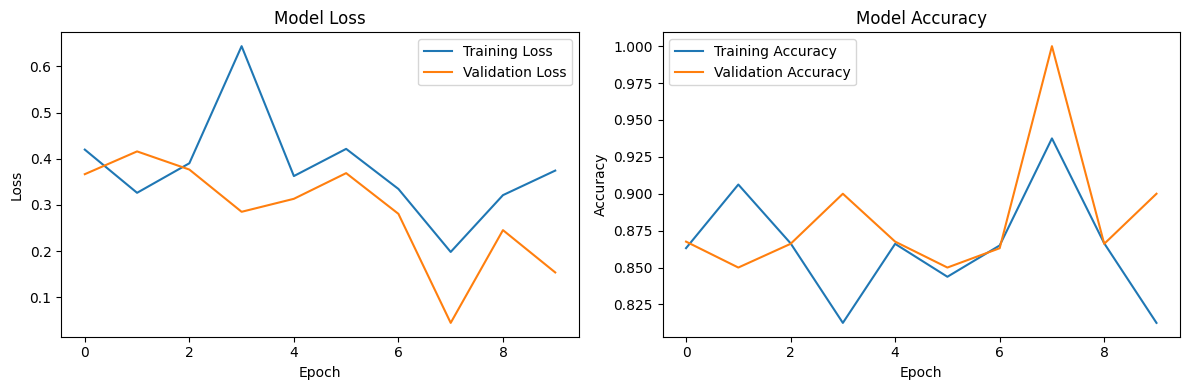

In [ ]:
# Plot training & validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# **Gradio Interface **

In [ ]:
import tensorflow as tf

In [ ]:
!pip install gradio


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 48.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.0/94.0 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 50.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.4/71.4 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 8.1 MB/s eta 0:00:00
  Attempting uninstall: tomlkit
    Found existing in

In [ ]:
import gradio as gr

In [ ]:
def predict_glaucoma(image):
    # Resize the image to match the model's expected input shape
    image = tf.image.resize(image, (img_width, img_height))
    # Add batch dimension and ensure correct number of channels
    image = tf.expand_dims(image, 0)
    image = tf.image.grayscale_to_rgb(image) if image.shape[-1] == 1 else image
    # Normalize the image
    image = image / 255.0

    cnn_features = cnn_model.predict(image)
    cnn_features_scaled = scaler.transform(cnn_features)
    prediction = rf_model.predict_proba(cnn_features_scaled)[0]
    return {
        "Normal": float(prediction[0]),
        "Glaucoma": float(prediction[1])
    }

# Update the Gradio interface
iface = gr.Interface(
    fn=predict_glaucoma,
    inputs=gr.Image(),
    outputs=gr.Label(num_top_classes=2),
    live=True,
    title="Glaucoma Detection Model"
)

In [ ]:
iface.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://17372bf1e5413c32f2.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
